In [1]:
import numpy as np
import pandas as pd

# visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/test.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/gender_submission.csv
/kaggle/input/datasets/heptapod/titanic/train_and_test2.csv


In [2]:


train = pd.read_csv('/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv')
test = pd.read_csv('/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [4]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#train['Age'].fillna(train['Age'].median(), inplace=True)

train['Age'] = train['Age'].fillna(train['Age'].median())


#train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [6]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
train = train.drop(['Cabin'], axis=1, errors='ignore')
train = train.drop(['PassengerId','Name','Ticket'], axis=1)


In [8]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])


In [10]:
X = train.drop('Survived', axis=1)
y = train['Survived']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=44
)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}


In [14]:
results = {}

for name, model in models.items():
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7318
Decision Tree Accuracy: 0.7207
Random Forest Accuracy: 0.7151
KNN Accuracy: 0.6760
SVM Accuracy: 0.6592


In [15]:
results_df = pd.DataFrame(list(results.items()),
                          columns=['Algorithm','Accuracy'])

results_df.sort_values(by='Accuracy', ascending=False)


,Algorithm,Accuracy
0,Logistic Regression,0.731844
1,Decision Tree,0.720670
2,Random Forest,0.715084
3,KNN,0.675978
4,SVM,0.659218


In [16]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df


,Algorithm,Accuracy
0,Logistic Regression,0.731844
1,Decision Tree,0.720670
2,Random Forest,0.715084
3,KNN,0.675978
4,SVM,0.659218


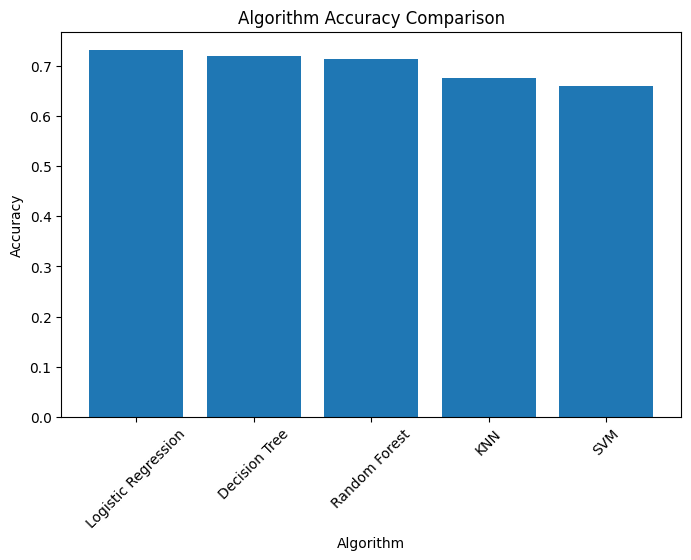

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Algorithm'], results_df['Accuracy'])
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [18]:
#finding the best model automatically
best_model = results_df.iloc[0]
print("Best Algorithm:", best_model['Algorithm'])
print("Accuracy:", best_model['Accuracy'])


Best Algorithm: Logistic Regression
Accuracy: 0.7318435754189944


 # Conclusion:
 
* The Titanic dataset was analyzed using multiple machine learning algorithms to predict passenger survival.

* Data preprocessing was performed by handling missing values and encoding categorical features.

* Different models were trained and evaluated using accuracy score.

* Among all algorithms, Logistic Regression achieved the best performance with an accuracy of 73.18%.

* The project demonstrates how machine learning can be used to make predictions from real-world data. 

 

 

In [19]:
print(train.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
